This notebook is a follow up on the supervised ML notebook.
It uses the same dataset but this time tests unsupervised ML to cluster the data.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import BisectingKMeans, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [86]:
data = pd.read_csv("/home/kasia/data_ML/ML_data.csv")
data = data.set_index("id")

In [87]:
# Data scaling
X = data.iloc[:, 1:].to_numpy()
Y = data.loc[:, "diagnosis"]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Text(0.5, 0, 'PC')

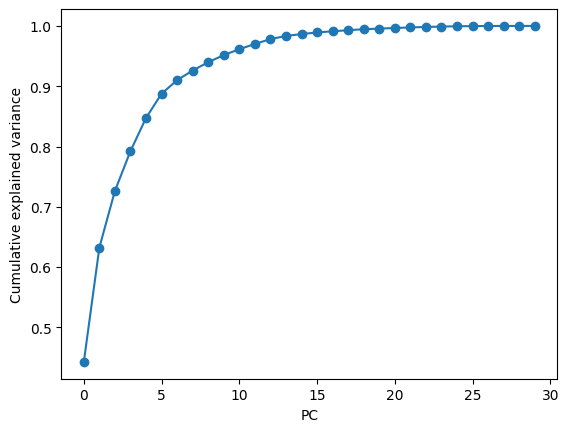

In [88]:
# running pca on the scaled data
pca = decomposition.PCA()
pca.fit_transform(X_std)
plt.plot(pca.explained_variance_ratio_.cumsum(), marker="o")
plt.ylabel("Cumulative explained variance")
plt.xlabel("PC")

Text(0.5, 0, 'PC')

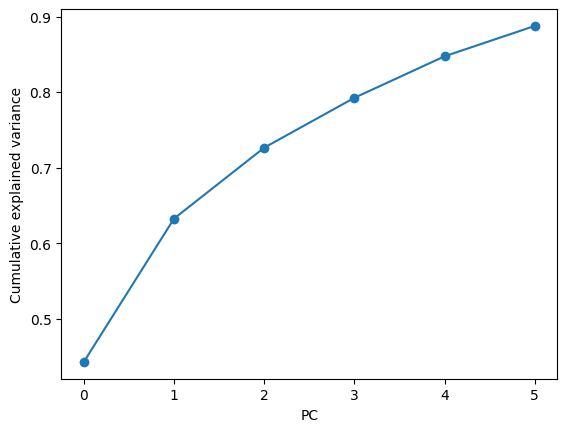

In [89]:
# The plot indicates that it would be best to use 6 PCs
pca = decomposition.PCA(n_components=6)
pca_features = pca.fit_transform(X_std)
plt.plot(pca.explained_variance_ratio_.cumsum(), marker="o")
plt.ylabel("Cumulative explained variance")
plt.xlabel("PC")

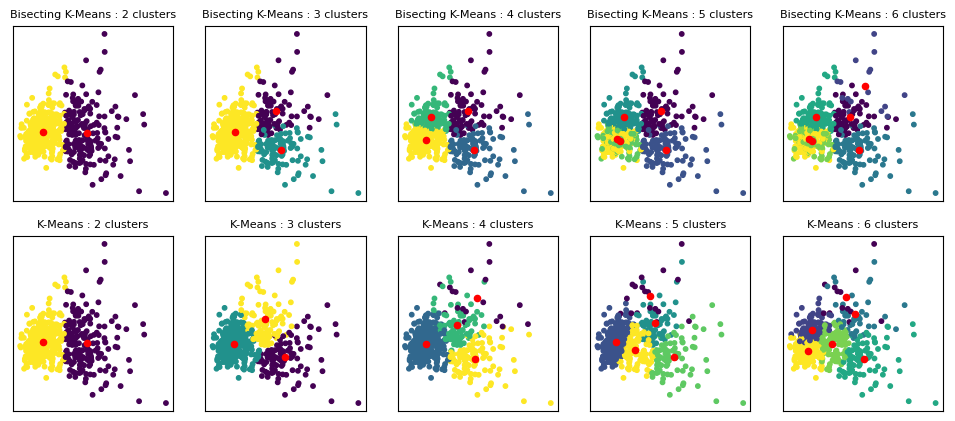

In [90]:
# Data clustering - comparison of two algorithms, using PC1 and PC2 for illustration
# Number of clusters for KMeans and BisectingKMeans
n_clusters_list = [2, 3, 4, 5, 6]

# Algorithms to compare
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(12, 5)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=42)
        algo.fit(pca_features)
        centers = algo.cluster_centers_

        axs[j, i].scatter(pca_features[:, 0], pca_features[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)
        axs[j, i].set_title(
            f"{algorithm_name} : {n_clusters} clusters", fontdict={"fontsize": 8}
        )

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [92]:
#Create dataframe with the PCA and clustering results
#By looking at the plots seems like BisectingKmeans algorithm can seperate data in 4 distinct clusters
bkm_4=BisectingKMeans(n_clusters=4, random_state=42)
bkm_4.fit(pca_features)

result_df_pca_bkm=pd.concat([data.reset_index(drop=True), pd.DataFrame(pca_features)], axis=1)
result_df_pca_bkm.columns.values[-6:]=["PC1","PC2", "PC3","PC4","PC5","PC6"]
result_df_pca_bkm["Cluster"]=bkm_4.labels_